In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\td\Downloads\MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...,...
9200,2022-09-13,258.839996,260.399994,251.589996,251.990005,251.990005,33353300
9201,2022-09-14,253.529999,254.229996,249.860001,252.220001,252.220001,23913000
9202,2022-09-15,249.770004,251.399994,244.020004,245.380005,245.380005,31530900
9203,2022-09-16,244.259995,245.300003,242.059998,244.740005,244.740005,39775100


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9200,2022-09-13,251.990005
9201,2022-09-14,252.220001
9202,2022-09-15,245.380005
9203,2022-09-16,244.740005


In [4]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9200    2022-09-13
9201    2022-09-14
9202    2022-09-15
9203    2022-09-16
9204    2022-09-19
Name: Date, Length: 9205, dtype: object

In [5]:
import datetime

# функция ковертирующяя строку в дату
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

d_obj =str_to_datetime('1986-03-12')
d_obj

datetime.datetime(1986, 3, 12, 0, 0)

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\huitd\AppData\Local\Temp\ipykernel_89504\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9200   2022-09-13
9201   2022-09-14
9202   2022-09-15
9203   2022-09-16
9204   2022-09-19
Name: Date, Length: 9205, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-09-13,251.990005
2022-09-14,252.220001
2022-09-15,245.380005


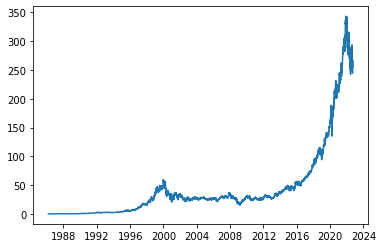

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '1986-08-13', 
                                '2022-09-19', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-08-13,0.096354,0.099826,0.102431,0.103299
1,1986-08-14,0.099826,0.102431,0.103299,0.105903
2,1986-08-15,0.102431,0.103299,0.105903,0.106337
3,1986-08-18,0.103299,0.105903,0.106337,0.105035
4,1986-08-19,0.105903,0.106337,0.105035,0.105035
...,...,...,...,...,...
9094,2022-09-13,258.519989,264.459991,266.649994,251.990005
9095,2022-09-14,264.459991,266.649994,251.990005,252.220001
9096,2022-09-15,266.649994,251.990005,252.220001,245.380005
9097,2022-09-16,251.990005,252.220001,245.380005,244.740005


In [14]:
# convert to numpy arrays
def windowed_df_to_date_X_y(windowed_dataframe):

    df_as_np = windowed_dataframe.to_numpy()
    
    # получаем даты
    dates = df_as_np[:, 0]
    
    # берез значения с середины Target-3 Target-2 Target-1
    middle_matrix = df_as_np[:, 1:-1]
    
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    print(X)
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y= windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

[[[0.096354]
  [0.099826]
  [0.102431]]

 [[0.099826]
  [0.102431]
  [0.103299]]

 [[0.102431]
  [0.103299]
  [0.105903]]

 ...

 [[266.649994]
  [251.990005]
  [252.220001]]

 [[251.990005]
  [252.220001]
  [245.380005]]

 [[252.220001]
  [245.380005]
  [244.740005]]]


((9099,), (9099, 3, 1), (9099,))

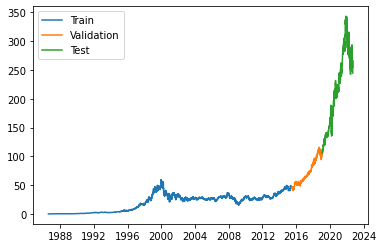

In [15]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80: q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [17]:
# создадим и обучим нашу модель
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                   layers.LSTM(64),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
228/228 [==============================] - 10s 7ms/step - loss: 137.2671 - mean_absolute_error: 5.6008 - val_loss: 1001.6553 - val_mean_absolute_error: 23.8647
Epoch 2/100
228/228 [==============================] - 1s 5ms/step - loss: 0.4414 - mean_absolute_error: 0.3595 - val_loss: 814.4686 - val_mean_absolute_error: 20.4434
Epoch 3/100
228/228 [==============================] - 1s 6ms/step - loss: 0.3519 - mean_absolute_error: 0.3423 - val_loss: 727.4456 - val_mean_absolute_error: 18.9112
Epoch 4/100
228/228 [==============================] - 1s 6ms/step - loss: 0.3393 - mean_absolute_error: 0.3376 - val_loss: 673.5237 - val_mean_absolute_error: 17.8251
Epoch 5/100
228/228 [==============================] - 1s 6ms/step - loss: 0.3462 - mean_absolute_error: 0.3520 - val_loss: 653.7560 - val_mean_absolute_error: 17.5342
Epoch 6/100
228/228 [==============================] - 1s 6ms/step - loss: 0.3021 - mean_absolute_error: 0.3179 - val_loss: 629.8975 - val_mean_absolute_err

228/228 [==============================] - 1s 6ms/step - loss: 0.2998 - mean_absolute_error: 0.3216 - val_loss: 424.4041 - val_mean_absolute_error: 13.5604
Epoch 98/100
228/228 [==============================] - 1s 6ms/step - loss: 0.2890 - mean_absolute_error: 0.3090 - val_loss: 418.1819 - val_mean_absolute_error: 13.4081
Epoch 99/100
228/228 [==============================] - 1s 5ms/step - loss: 0.3045 - mean_absolute_error: 0.3215 - val_loss: 384.1297 - val_mean_absolute_error: 12.4759
Epoch 100/100
228/228 [==============================] - 1s 5ms/step - loss: 0.2943 - mean_absolute_error: 0.3163 - val_loss: 379.3763 - val_mean_absolute_error: 12.3068


228/228 [==============================] - 0s 2ms/step


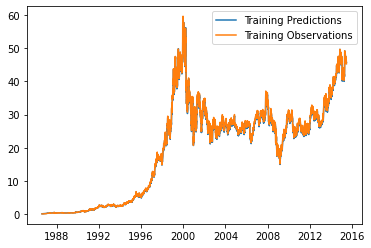

In [20]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 2ms/step


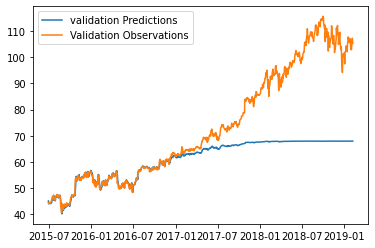

In [21]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['validation Predictions', 'Validation Observations'])

29/29 [==============================] - 0s 2ms/step


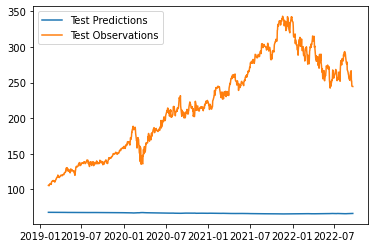

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

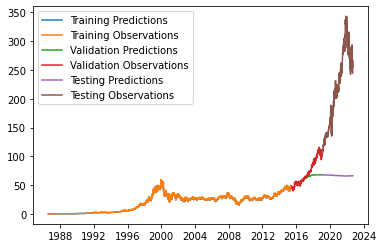

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [24]:
# результаты получились плохими, поэтому возьмем кусок поменьше и обучим еще раз
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2021-09-19', 
                                '2022-09-19', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-09-19,299.790009,304.820007,305.220001,299.869995
1,2021-09-21,305.220001,299.869995,294.299988,294.799988
2,2021-09-22,299.869995,294.299988,294.799988,298.579987
3,2021-09-23,294.299988,294.799988,298.579987,299.559998
4,2021-09-24,294.799988,298.579987,299.559998,299.350006
...,...,...,...,...,...
247,2022-09-13,258.519989,264.459991,266.649994,251.990005
248,2022-09-14,264.459991,266.649994,251.990005,252.220001
249,2022-09-15,266.649994,251.990005,252.220001,245.380005
250,2022-09-16,251.990005,252.220001,245.380005,244.740005


In [25]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    # обрез значений с середины Target-3 Target-2 Target-1
    middle_matrix = df_as_np[:, 1:-1]
    
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    print(X)
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y= windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

[[[299.790009]
  [304.820007]
  [305.220001]]

 [[305.220001]
  [299.869995]
  [294.299988]]

 [[299.869995]
  [294.299988]
  [294.799988]]

 [[294.299988]
  [294.799988]
  [298.579987]]

 [[294.799988]
  [298.579987]
  [299.559998]]

 [[298.579987]
  [299.559998]
  [299.350006]]

 [[299.559998]
  [299.350006]
  [294.170013]]

 [[299.350006]
  [294.170013]
  [283.519989]]

 [[294.170013]
  [283.519989]
  [284.0]]

 [[283.519989]
  [284.0]
  [281.920013]]

 [[284.0]
  [281.920013]
  [289.100006]]

 [[281.920013]
  [289.100006]
  [283.109985]]

 [[289.100006]
  [283.109985]
  [288.76001]]

 [[283.109985]
  [288.76001]
  [293.109985]]

 [[288.76001]
  [293.109985]
  [294.850006]]

 [[293.109985]
  [294.850006]
  [294.850006]]

 [[294.850006]
  [294.850006]
  [294.230011]]

 [[294.850006]
  [294.230011]
  [292.880005]]

 [[294.230011]
  [292.880005]
  [296.309998]]

 [[292.880005]
  [296.309998]
  [302.75]]

 [[296.309998]
  [302.75]
  [304.209991]]

 [[302.75]
  [304.209991]
  [307.290009

((252,), (252, 3, 1), (252,))

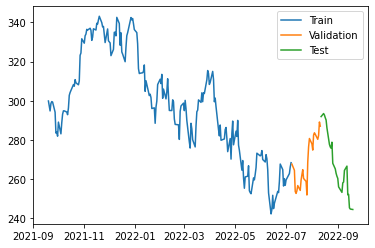

In [26]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80: q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [27]:
# создадим и обучим нашу модель
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                   layers.LSTM(64),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 58ms/step - loss: 89358.5000 - mean_absolute_error: 297.7880 - val_loss: 72238.4453 - val_mean_absolute_error: 268.4989
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 89074.8828 - mean_absolute_error: 297.3101 - val_loss: 71955.1875 - val_mean_absolute_error: 267.9709
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 88729.1328 - mean_absolute_error: 296.7299 - val_loss: 71572.3594 - val_mean_absolute_error: 267.2556
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 88260.6484 - mean_absolute_error: 295.9371 - val_loss: 71061.7422 - val_mean_absolute_error: 266.2984
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 87609.3438 - mean_absolute_error: 294.8379 - val_loss: 70333.7031 - val_mean_absolute_error: 264.9280
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 86704.7344 - mean_absolute_error: 293.2952 - val_loss: 69434.

Epoch 49/100
7/7 [==============================] - 0s 10ms/step - loss: 680.9963 - mean_absolute_error: 21.3977 - val_loss: 1011.6755 - val_mean_absolute_error: 29.4107
Epoch 50/100
7/7 [==============================] - 0s 9ms/step - loss: 681.0668 - mean_absolute_error: 21.3986 - val_loss: 1010.3631 - val_mean_absolute_error: 29.3884
Epoch 51/100
7/7 [==============================] - 0s 10ms/step - loss: 681.0920 - mean_absolute_error: 21.3973 - val_loss: 1009.4261 - val_mean_absolute_error: 29.3725
Epoch 52/100
7/7 [==============================] - 0s 10ms/step - loss: 681.0612 - mean_absolute_error: 21.4023 - val_loss: 985.2528 - val_mean_absolute_error: 28.9581
Epoch 53/100
7/7 [==============================] - 0s 10ms/step - loss: 680.6014 - mean_absolute_error: 21.4000 - val_loss: 971.7104 - val_mean_absolute_error: 28.7330
Epoch 54/100
7/7 [==============================] - 0s 10ms/step - loss: 678.0397 - mean_absolute_error: 21.4510 - val_loss: 857.5927 - val_mean_absolute

1/1 [==============================] - 0s 235ms/step


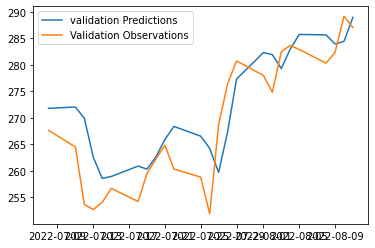

In [28]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


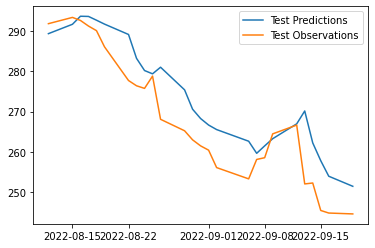

In [29]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

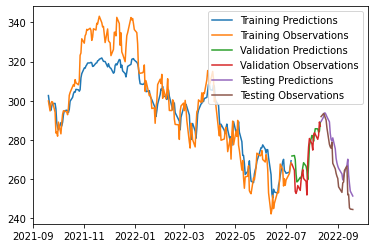

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

7/7 [==============================] - 0s 3ms/step


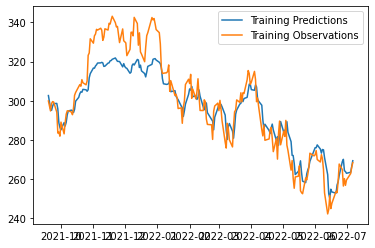

In [31]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [34]:
# с прогнозируем будущие акции

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 12ms/step


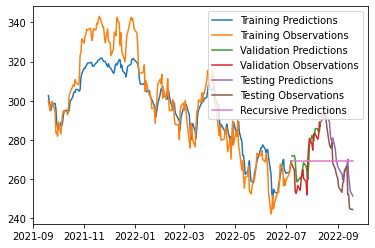

In [35]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])